In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

SPIDER = "/home/n/nichollsh/PROTEUS/SPIDER/"

In [12]:
liquidus = np.loadtxt(SPIDER+"lookup_data/1TPa-dK09-elec-free/liquidus_A11_H13.dat").T
liquidus[0] *= 1000000000.0
liquidus[1] *= 4824266.84604467

solidus = np.loadtxt(SPIDER+"lookup_data/1TPa-dK09-elec-free/solidus_A11_H13.dat").T
solidus[0] *= 1000000000.0
solidus[1] *= 4824266.84604467

In [13]:
# solid
# filename = SPIDER+"lookup_data/1TPa-dK09-elec-free/heat_capacity_solid.dat"
# scaling = [1000000000.0 ,  4824266.84604467 , 4824266.84604467]

filename = SPIDER+"lookup_data/1TPa-dK09-elec-free/temperature_solid.dat"
scaling = [1000000000.0, 4824266.84604467, 1.0]

solid_raw = np.loadtxt(filename).T
q_solid  = ["p","s","t"]
solid_data = {}
for i in range(3):
    solid_data[q_solid[i]] = solid_raw[i] * scaling[i]

In [14]:
# melt
# filename = SPIDER+"lookup_data/1TPa-dK09-elec-free/heat_capacity_melt.dat"
# scaling = [1000000000.0 ,  4824266.84604467 , 4824266.84604467]

filename = SPIDER+"lookup_data/1TPa-dK09-elec-free/temperature_melt.dat"
scaling = [1000000000.0, 4805046.659407042, 1.0]

melt_raw = np.loadtxt(filename).T
q_melt  = ["p","s","t"]
melt_data = {}
for i in range(3):
    melt_data[q_melt[i]] = melt_raw[i] * scaling[i]

In [62]:
# target
prs = 300e9

def _measure(x,y,x0,y0):
    return np.sqrt((x-x0)**2 + (y-y0)**2)

# find nearest point on solidus
sol_ent = solidus[1][np.argmin(np.abs(solidus[0] - prs))]

min_dst = np.inf
min_idx = 0
for i in range(len(solid_data['t'])):
    x0 = prs
    y0 = sol_ent

    xn = np.amax(solidus[0])
    yn = np.amax(solidus[1])

    dst = _measure(solid_data['p'][i]/xn, solid_data['s'][i]/yn, x0/xn, y0/yn)
    if dst < min_dst:
        min_dst = dst
        min_idx = i

sol_tmp = solid_data['t'][min_idx]


# find nearest point on liquidus
liq_ent = liquidus[1][np.argmin(np.abs(liquidus[0] - prs))]

min_dst = np.inf
min_idx = 0
for i in range(len(melt_data['t'])):
    x0 = prs
    y0 = liq_ent

    xn = np.amax(liquidus[0])
    yn = np.amax(liquidus[1])

    dst = _measure(melt_data['p'][i]/xn, melt_data['s'][i]/yn, x0/xn, y0/yn)
    if dst < min_dst:
        min_dst = dst
        min_idx = i

mel_tmp = melt_data['t'][min_idx]

In [63]:
print("Melt  tmp  = %.2f K"%mel_tmp)
print("Solid tmp  = %.2f K"%sol_tmp)
print("melt-solid = %.3f K"%(mel_tmp - sol_tmp))

Melt  tmp  = 7563.40 K
Solid tmp  = 6866.94 K
melt-solid = 696.466 K


In [58]:
plt.close("all")
%matplotlib widget

x limits: [0.00, 1000.00]
y limits: [-84.79, 2394.82]
x limits: [0.00, 1000.00]
y limits: [445.98, 3236.04]


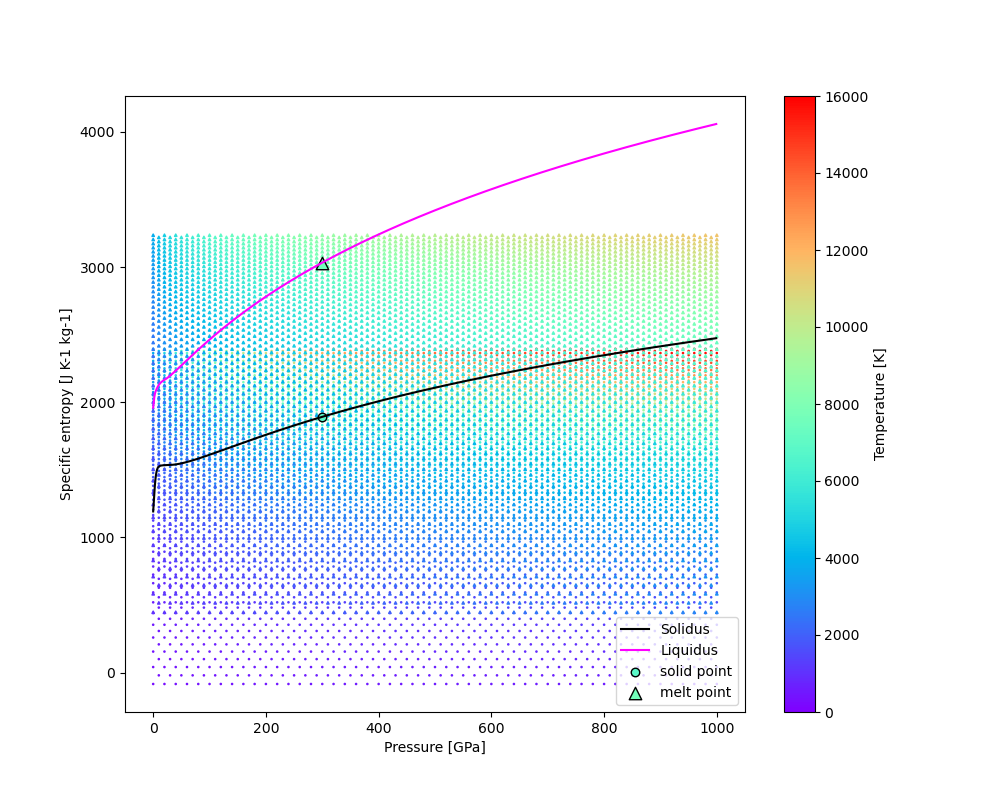

In [69]:
fig,ax = plt.subplots(1,1, figsize=(10,8))

stride = 40

# Colour mapping
cmap = 'rainbow'
norm = mpl.colors.Normalize(vmin=0, vmax=16000)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

markers = ['.','^']
sources = [solid_data, melt_data]

for i,data in enumerate(sources):

    x = data["p"][::stride] * 1e-9
    y = data["s"][::stride]
    z = data["t"][::stride]
    sm = ax.scatter(x,y,c=z, s=3, marker=markers[i], cmap=cmap, norm=norm)

    print("x limits: [%.2f, %.2f]"%(np.amin(x), np.amax(x)))
    print("y limits: [%.2f, %.2f]"%(np.amin(y), np.amax(y)))

fig.colorbar(sm, label="Temperature [K]")


ax.plot(solidus[0]* 1e-9,  solidus[1],  label="Solidus", color='k')
ax.plot(liquidus[0]* 1e-9, liquidus[1], label="Liquidus", color='magenta')

ax.scatter(prs*1e-9, sol_ent, c=sol_tmp, label='solid point', cmap=cmap, norm=norm, s=150, edgecolors='k', marker=markers[0])
ax.scatter(prs*1e-9, liq_ent, c=mel_tmp, label='melt point',  cmap=cmap, norm=norm, s=80, edgecolors='k', marker=markers[1])


ax.legend(loc='lower right')
ax.set(xlabel="Pressure [GPa]", ylabel="Specific entropy [J K-1 kg-1]")

plt.show()